In [1]:
import csv
import graph_tool.all as gt
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
import os
import scipy.special as sc
import scipy
from sbm import sbm



(ipykernel_launcher.py:92047): Gtk-WARNING **: 21:02:30.640: Locale not supported by C library.
	Using the fallback 'C' locale.


In [2]:
model = sbm()
# patient_num = 115
patient_num = 56115
# patient_num = 10000

experimentName = str(patient_num)+"nested_noDegCorr_noDem" 
experimentName += "NoEq"
model.setOuputLoc(experimentName)

# model.make_graph(patient_num=patient_num, age=True,gender=True,ethnicity=True)
model.make_graph(patient_num=patient_num, age=False,gender=False,ethnicity=False)
model.save_graph()
model.fit(multilayer=False,deg_corr=True)
print("experiment "+ experimentName+ " done")

fit start
model minimized
fit complete
experiment 56115nested_noDegCorr_noDemNoEq done


In [5]:
print(model.state)

<NestedBlockState object, with base <BlockState object with 47408 blocks (174 nonempty), degree-corrected, for graph <Graph object, undirected, with 47515 vertices and 502792 edges, 2 internal vertex properties, at 0x16be87610>, at 0x16bc38100>, and 6 levels of sizes [(47515, 174), (174, 32), (32, 12), (12, 4), (4, 2), (2, 1)] at 0x16c9ddfd0>


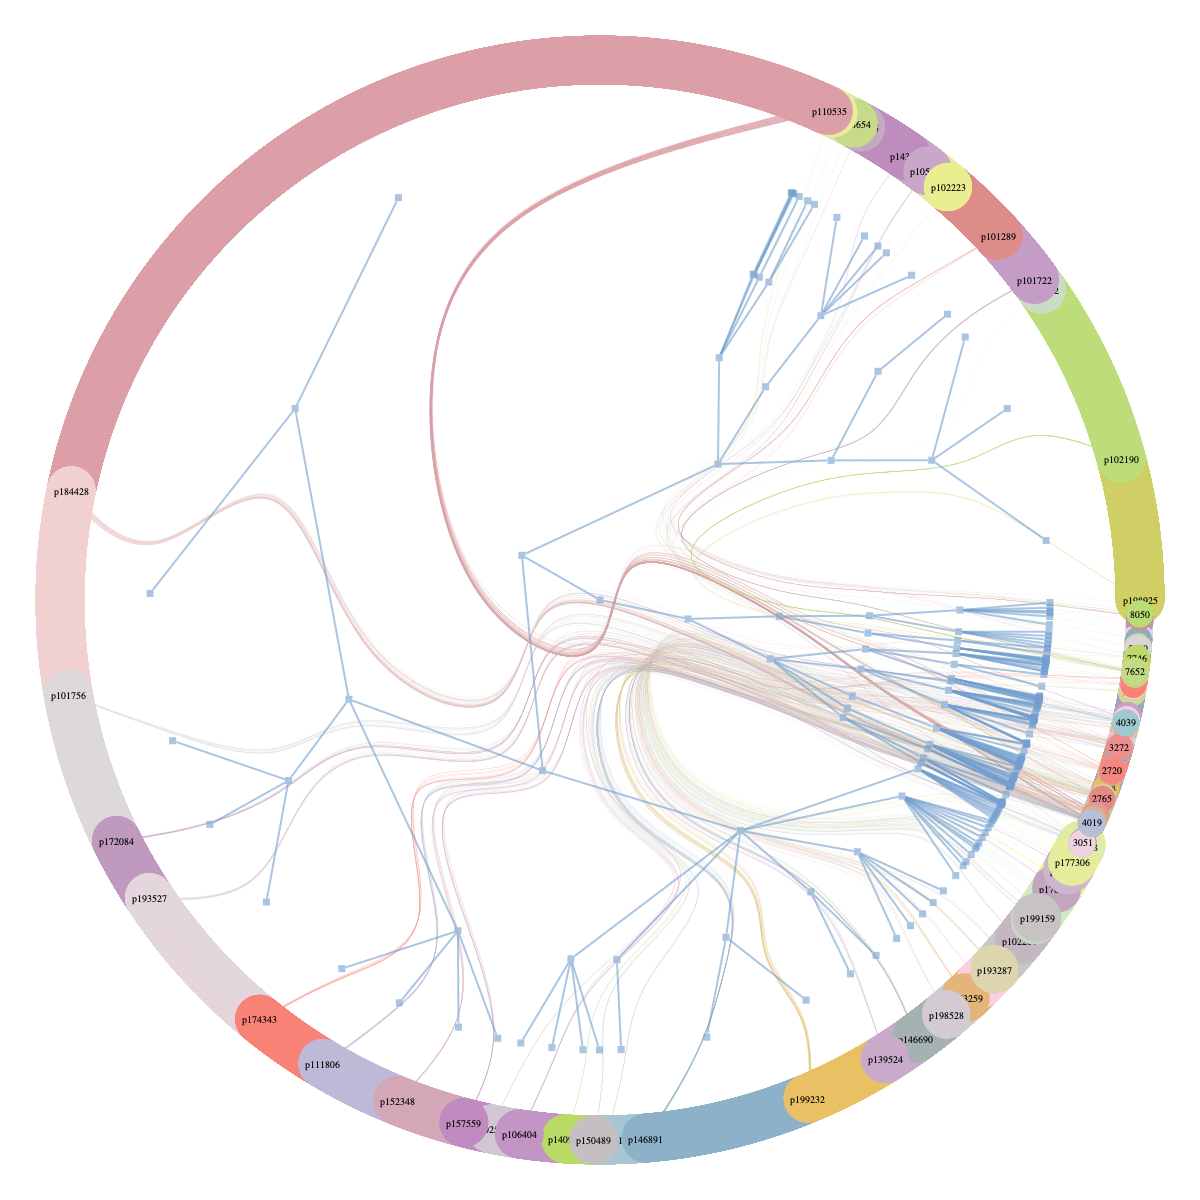

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16be87610, at 0x16c6b3130>,
 <Graph object, directed, with 47740 vertices and 47739 edges, at 0x16feb91c0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16feb91c0, at 0x170851820>)

In [134]:
gt.draw_hierarchy(model.state, subsample_edges=1000,vertex_text=model.g.vp['name'],vertex_font_size= 5,bg_color='w',hvertex_size=5,hedge_pen_width=1,output=self.output+"labelledHierarchy.pdf")


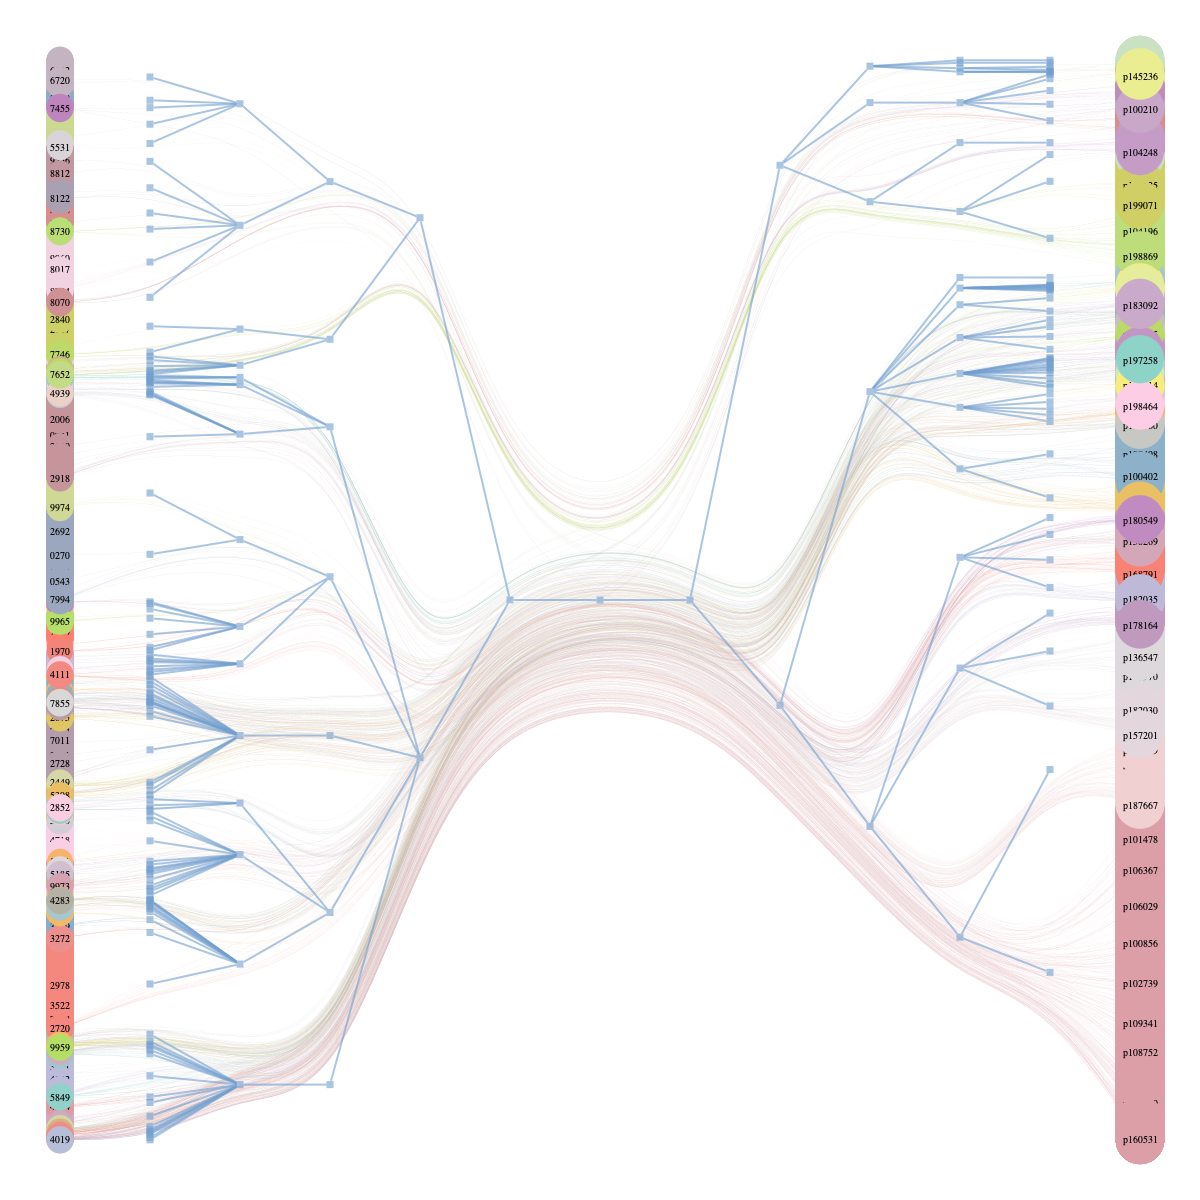

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16be87610, at 0x16db3ef40>,
 <Graph object, directed, with 47740 vertices and 47739 edges, at 0x16d941a30>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16d941a30, at 0x16d33ea00>)

In [58]:
# gt.draw_hierarchy(model.state,layout="bipartite")
gt.draw_hierarchy(model.state, subsample_edges=1000,layout="bipartite",vertex_text=model.g.vp['name'],vertex_font_size= 5,bg_color='w',text_position="centered",hvertex_size=5,hedge_pen_width=1, output=self.output+"labelledBipartiteHierarchy.pdf")

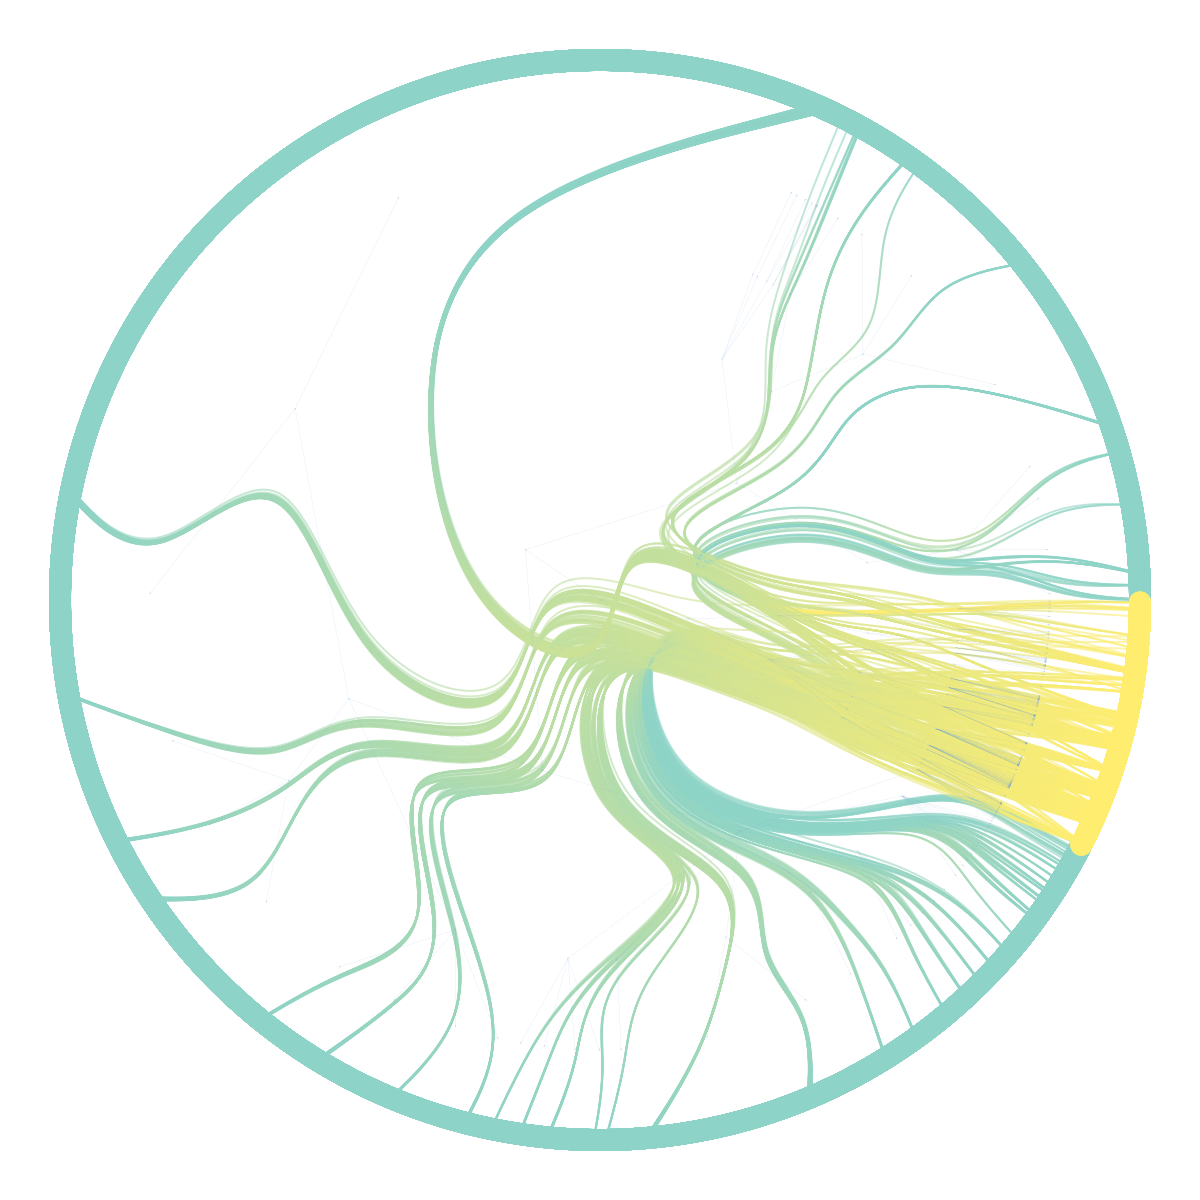

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16be87610, at 0x16d9042e0>,
 <Graph object, directed, with 47740 vertices and 47739 edges, at 0x16dbc5970>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x16dbc5970, at 0x16c14d2b0>)

In [60]:
gt.draw_hierarchy(model.state, subsample_edges=1000,bg_color='w',vertex_color=model.g.vp.kind,vertex_size=10,vertex_fill_color=model.g.vp.kind)


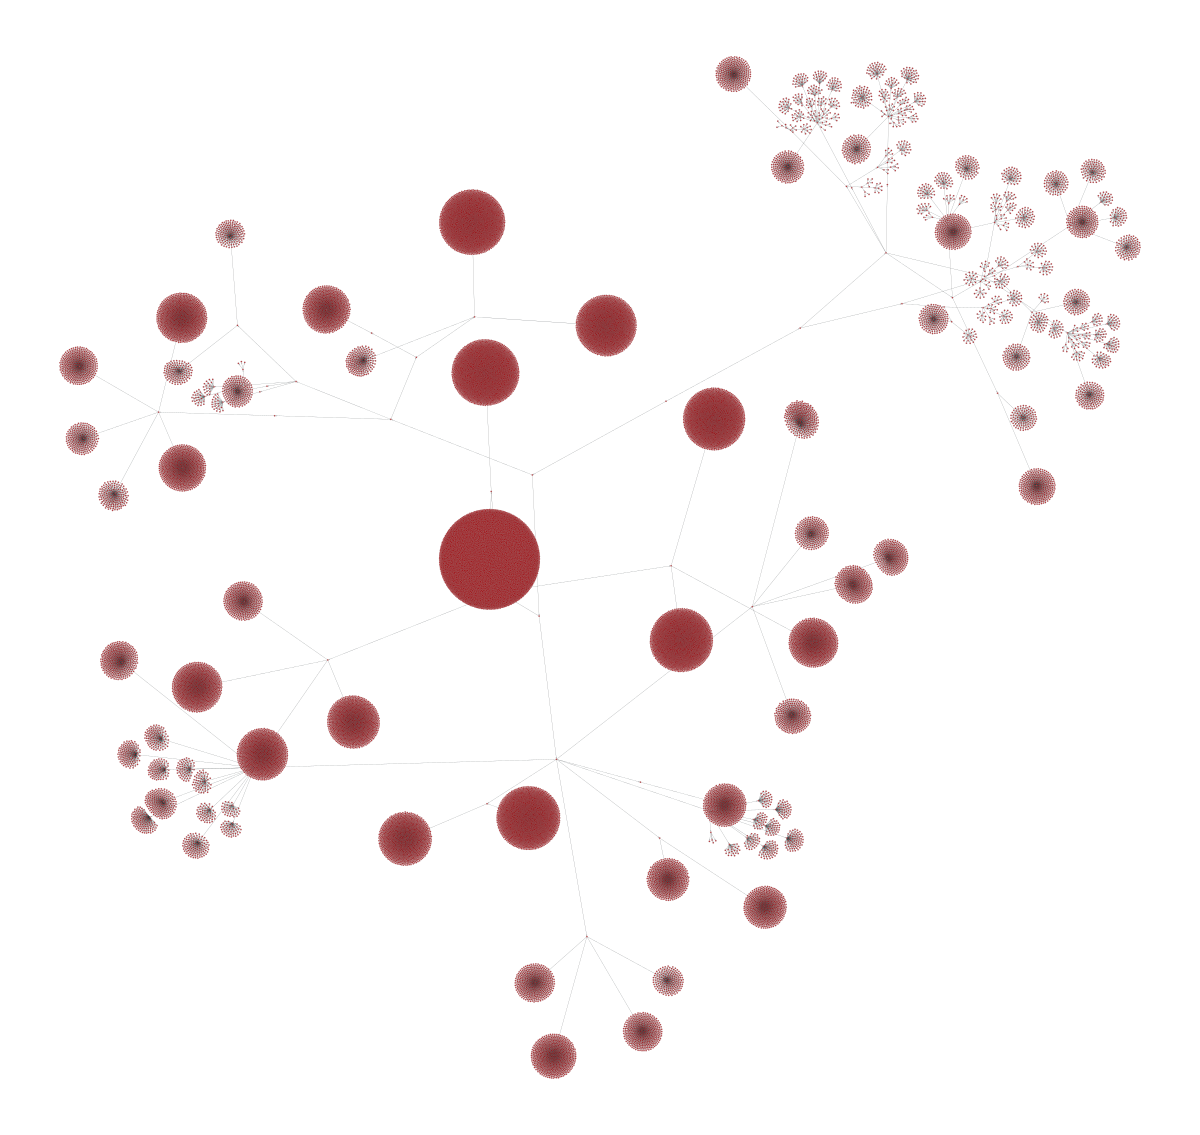

<VertexPropertyMap object with value type 'vector<double>', for a non-existent graph, at 0x171458d60>

In [168]:
gt.graph_draw(gt.get_hierarchy_tree(model.state)[0])

<NestedBlockState object, with base <BlockState object with 77 blocks (6 nonempty), degree-corrected, for graph <Graph object, undirected, with 77 vertices and 254 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x16d964580>, at 0x1707851f0>, and 8 levels of sizes [(77, 6), (6, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x170facf40>
[PropertyArray([63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 23, 58, 63, 63,
               63, 58, 58, 58, 58, 58, 58, 58, 58, 11, 11, 63, 23, 63, 41,
               58, 58, 63, 63, 41, 41, 41, 41, 41, 63, 63, 11, 11, 63, 63,
               63, 65, 65, 65, 63, 63, 63, 63, 63, 63, 23, 63, 65, 65, 65,
               65, 65, 65, 65, 65, 65, 65, 65, 11, 11, 11, 11, 63, 65, 65,
               11, 65], dtype=int32), PropertyArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 

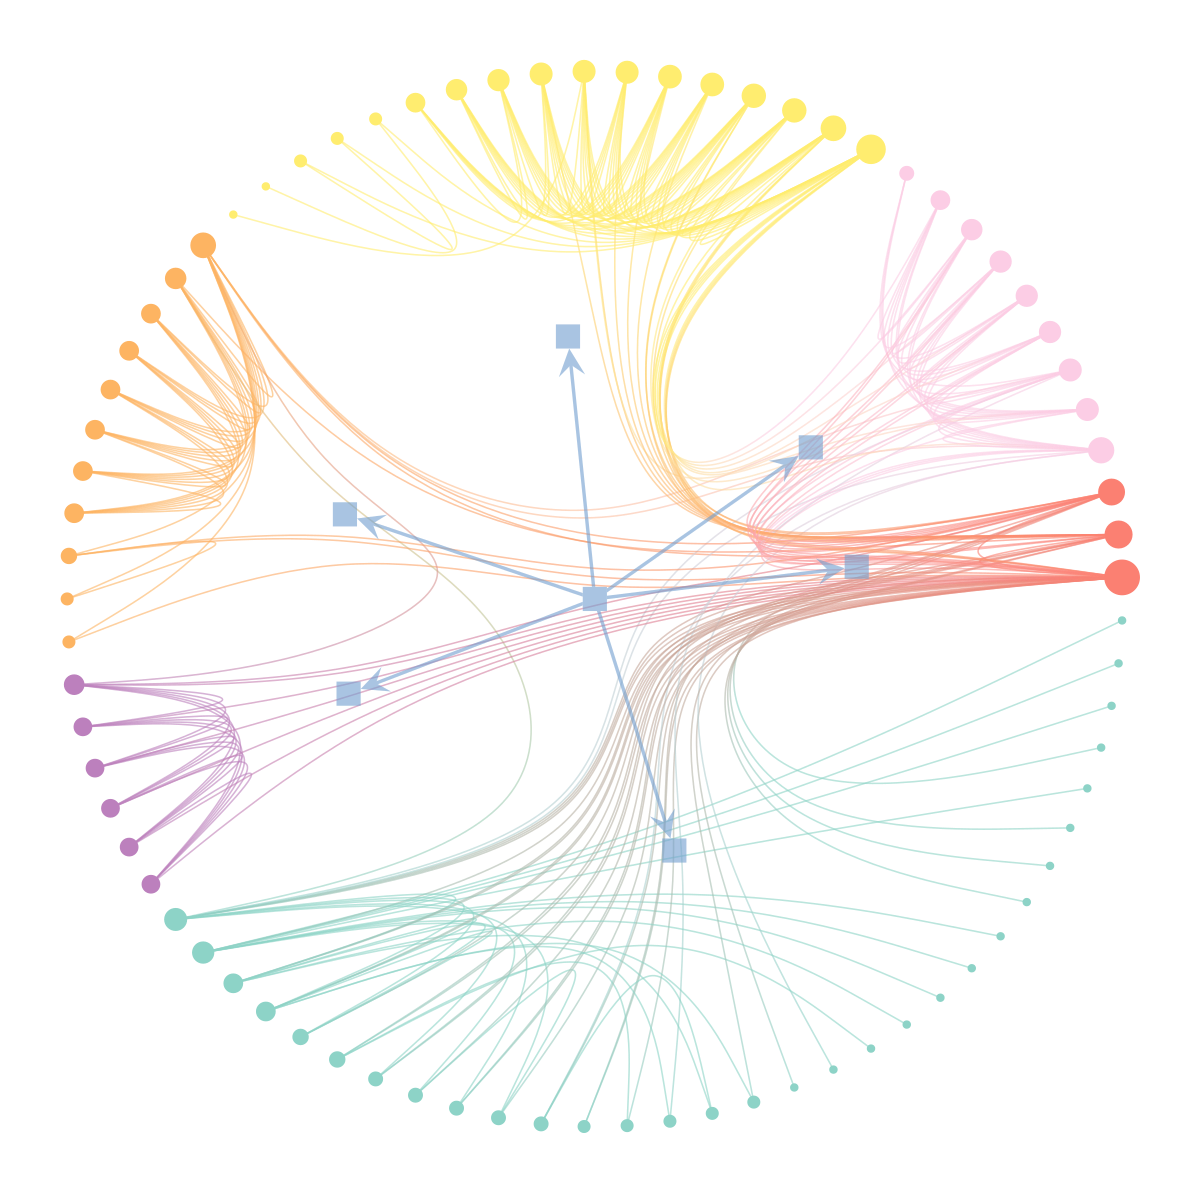

[<BlockState object with 77 blocks (6 nonempty), degree-corrected, for graph <Graph object, undirected, with 77 vertices and 254 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x16d964580>, at 0x1707851f0>, <BlockState object with 7 blocks (1 nonempty), for graph <Graph object, undirected, with 77 vertices and 16 edges, 2 internal vertex properties, 1 internal edge property, at 0x170fc3a30>, at 0x170e83cd0>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 7 vertices and 1 edge, 2 internal vertex properties, 1 internal edge property, at 0x1714f4580>, at 0x170e83ac0>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 1 vertex and 1 edge, at 0x171516400>, at 0x1710befa0>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 1 vertex and 1 edge, at 0x17150c700>, at 0x171516c40>, <BlockState object with 1 blocks (1 nonempty), for

In [192]:
g = gt.collection.data["lesmis"]
state = gt.minimize_nested_blockmodel_dl(g)
print(state)
print(state.get_bs())
print(state.get_bs()[1])
gt.draw_hierarchy(state)
print(state.get_levels())




In [142]:
c = gt.closeness(g)
print(c.a)
print(type(c.a))
print(np.sort(c.a)[::-1])


[0.42937853 0.3015873  0.41304348 0.41304348 0.3015873  0.3015873
 0.3015873  0.3015873  0.3015873  0.3015873  0.39378238 0.6440678
 0.41304348 0.39378238 0.39378238 0.39378238 0.39175258 0.34080717
 0.34080717 0.34080717 0.34080717 0.34080717 0.34080717 0.46060606
 0.46060606 0.5170068  0.47798742 0.5170068  0.4021164  0.42696629
 0.31799163 0.41758242 0.39378238 0.39583333 0.40425532 0.40425532
 0.40425532 0.40425532 0.40425532 0.37254902 0.34234234 0.39583333
 0.35185185 0.4021164  0.39790576 0.28787879 0.25675676 0.3438914
 0.51351351 0.44186047 0.33480176 0.44186047 0.3153527  0.30769231
 0.36538462 0.53146853 0.35185185 0.39583333 0.48101266 0.39175258
 0.35680751 0.39175258 0.4        0.39378238 0.475      0.39378238
 0.35849057 0.28464419 0.46341463 0.46341463 0.45238095 0.45783133
 0.4021164  0.34234234 0.34234234 0.38       0.35348837]
<class 'graph_tool.PropertyArray'>
[0.6440678  0.53146853 0.5170068  0.5170068  0.51351351 0.48101266
 0.47798742 0.475      0.46341463 0.4634

In [143]:
print(state)
print(state.get_bs())

<NestedBlockState object, with base <BlockState object with 77 blocks (7 nonempty), degree-corrected, for graph <Graph object, undirected, with 77 vertices and 254 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x16d964580>, at 0x16f35dc70>, and 8 levels of sizes [(77, 7), (7, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x166896b80>
[PropertyArray([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 42, 18, 52, 52,
               52, 18, 18, 18, 18, 18, 18, 18, 18, 42, 42, 52, 42, 52, 34,
               18, 18, 52, 52, 34, 34, 34, 34, 34, 52, 52, 70, 70, 52, 52,
               52, 52, 52, 48, 52, 52, 52, 52, 52, 52, 48, 52, 62, 62, 62,
               62, 62, 62, 62, 62, 62, 62, 62, 70, 70, 70, 70, 52, 52, 52,
               70, 62], dtype=int32), PropertyArray([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
               0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
               2, 0, 0, 0, 0, 0, 2, 0, 0, 

In [167]:
print(state.get_levels())

[<BlockState object with 71 blocks (7 nonempty), degree-corrected, for graph <Graph object, undirected, with 77 vertices and 254 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x16d964580>, at 0x170d077f0>, <BlockState object with 3 blocks (2 nonempty), for graph <Graph object, undirected, with 71 vertices and 20 edges, 2 internal vertex properties, 1 internal edge property, at 0x1710633a0>, at 0x171063760>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 3 vertices and 3 edges, 2 internal vertex properties, 1 internal edge property, at 0x1710333d0>, at 0x171063910>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 1 vertex and 1 edge, 2 internal vertex properties, 1 internal edge property, at 0x171030670>, at 0x171033d30>, <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 1 vertex and 1 edge, at 0x171040be0>, at 0x17103

b              (vertex)  (type: int32_t)
count          (vertex)  (type: int32_t)
count          (edge)    (type: int32_t)
<GraphView object, undirected, with 77 vertices and 254 edges, 2 internal vertex properties, 1 internal edge property, at 0x170cedd90>


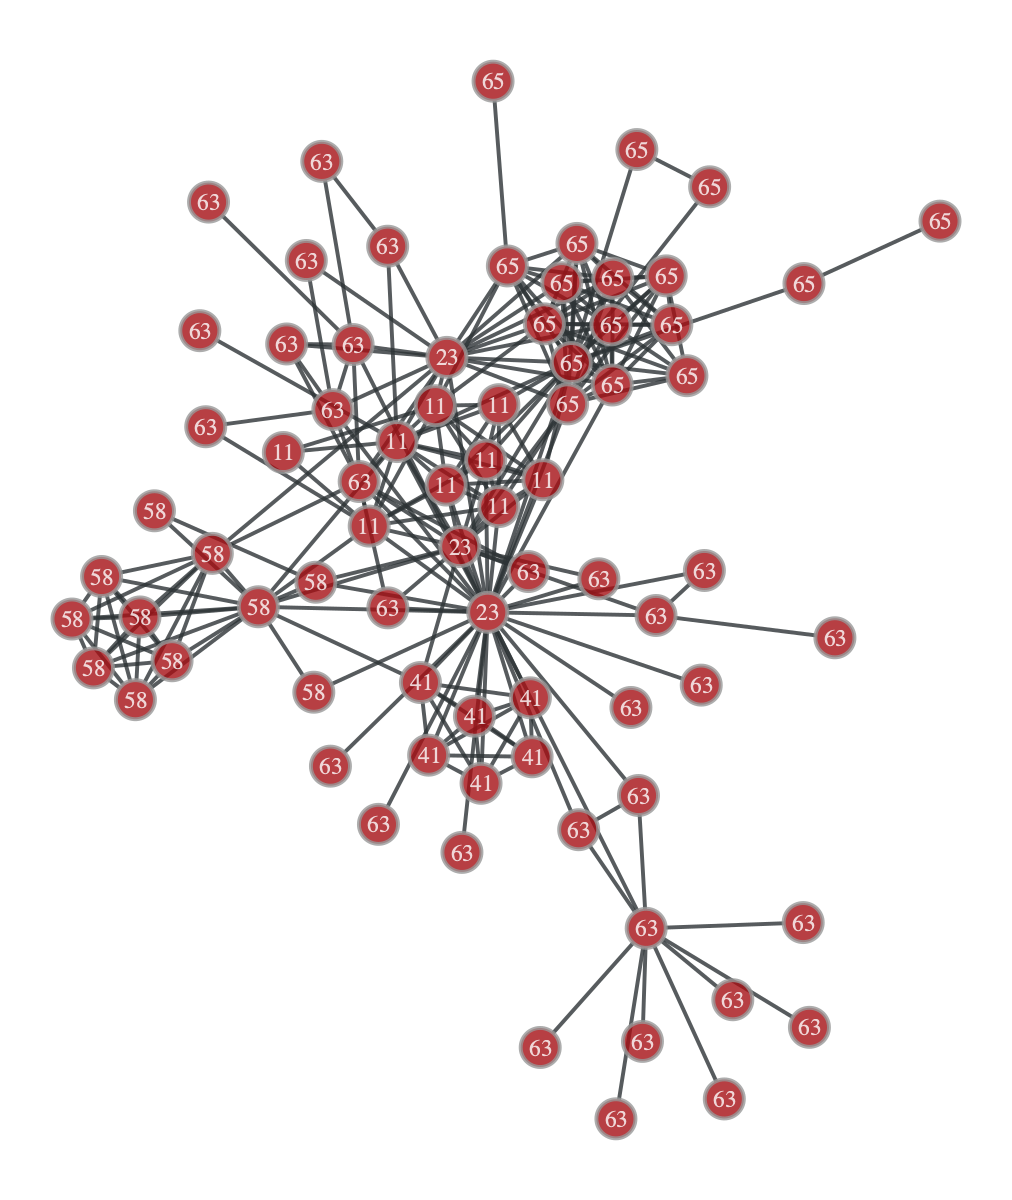

[63 63 63 63 63 63 63 63 63 63 63 23 58 63 63 63 58 58 58 58 58 58 58 58
 11 11 63 23 63 41 58 58 63 63 41 41 41 41 41 63 63 11 11 63 63 63 65 65
 65 63 63 63 63 63 63 23 63 65 65 65 65 65 65 65 65 65 65 65 11 11 11 11
 63 65 65 11 65]


In [218]:
state.get_bstack()
state.get_bstack()[0].list_properties()
print(state.get_bstack()[0])
gt.graph_draw(state.get_bstack()[0],vertex_text=state.get_bstack()[0].vp.b)
print(state.get_bstack()[0].vp.b.a)

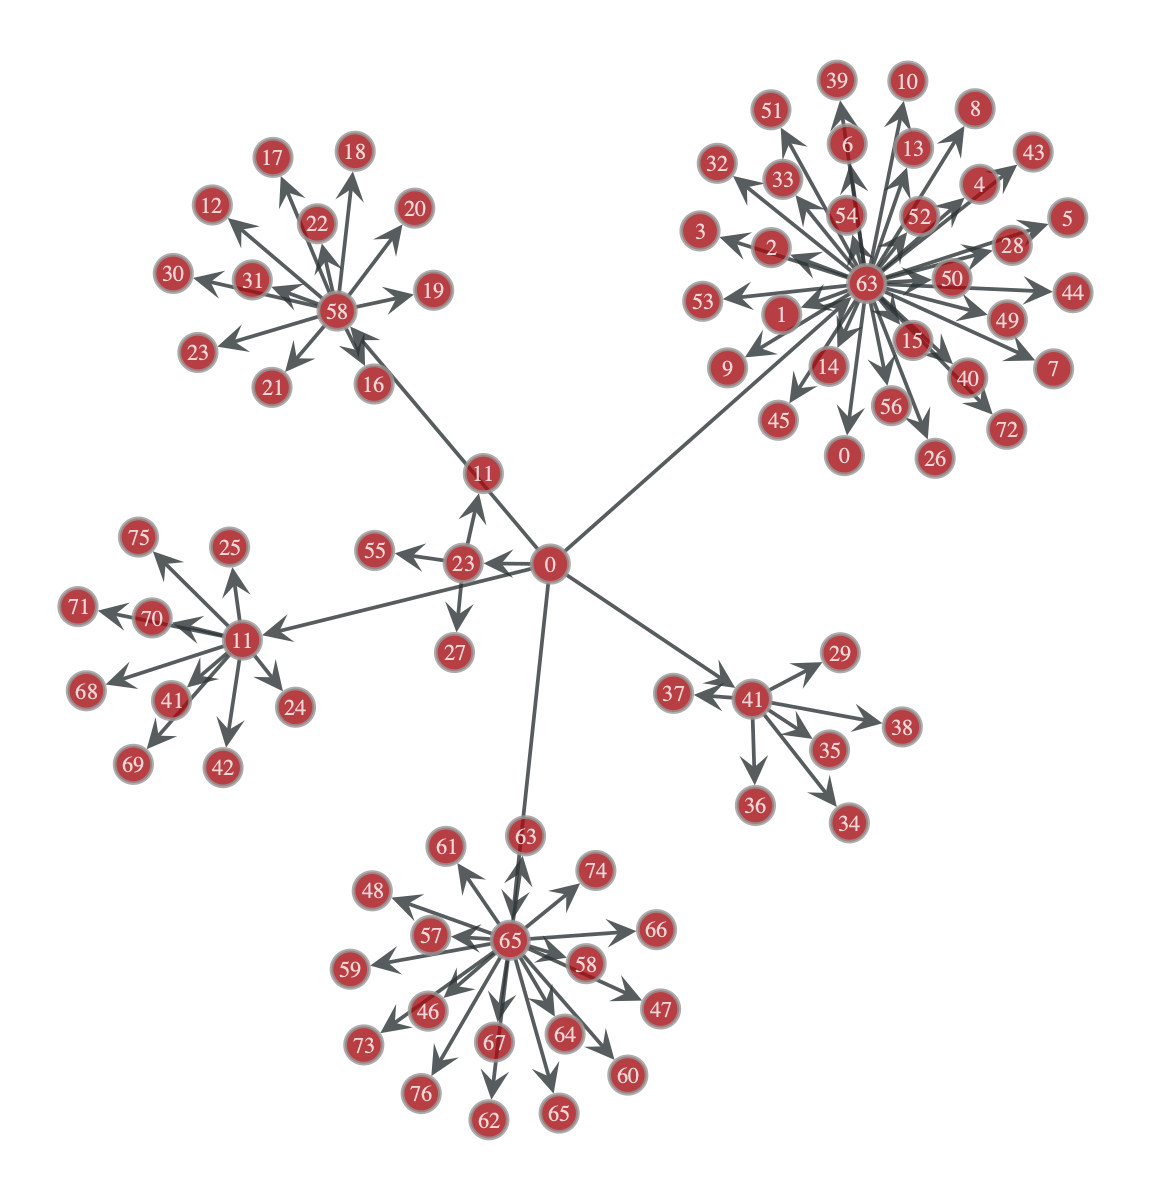

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x171aa4c70, at 0x1719b4b50>

In [220]:
(hierTree,label,order) = gt.get_hierarchy_tree(state)
gt.graph_draw(hierTree,vertex_text=label)


In [206]:
print(state.get_clabel(2).a)
hierTree = gt.get_hierarchy_tree(state.get_levels()[1])
print(hierTree[1].a)
# print(len(hierTree[2].a))
# print(len(np.unique(hierTree[2].a)))
gt.graph_draw(hierTree[0])


[0 0 0 0 0 0 0]


AttributeError: 'BlockState' object has no attribute 'get_bstack'